In [88]:
import yfinance as yf
import numpy as np
from scipy.optimize import minimize

In [141]:
tickers = ['^GSPC', 'GC=F','TSLA','AAPL','GOOGL','AMZN', 'MSFT', 'ABBV', 'AMC']

In [142]:
df = yf.download(tickers,start='2010-01-01')['Adj Close']

[*********************100%***********************]  9 of 9 completed


In [143]:
ret_df= np.log(df/df.shift(1))
# rowwise, goes row by row, and divides it by
# the previous row, and takes the log of it to find log returns


In [144]:
ret_df.corr()
# Correlations of gold and S&P
# Slightly positive correlation

,AAPL,ABBV,AMC,AMZN,GC=F,GOOGL,MSFT,TSLA,^GSPC
AAPL,1.000000,0.285090,0.166453,0.490861,0.051893,0.566926,0.598657,0.357230,0.689688
ABBV,0.285090,1.000000,0.048216,0.259649,-0.037738,0.363687,0.379546,0.191863,0.502743
AMC,0.166453,0.048216,1.000000,0.149550,-0.032305,0.170024,0.178002,0.176551,0.235703
AMZN,0.490861,0.259649,0.149550,1.000000,0.010250,0.601656,0.563651,0.356068,0.596022
GC=F,0.051893,-0.037738,-0.032305,0.010250,1.000000,0.014315,0.024819,0.057568,0.043475
GOOGL,0.566926,0.363687,0.170024,0.601656,0.014315,1.000000,0.655118,0.341455,0.711278
MSFT,0.598657,0.379546,0.178002,0.563651,0.024819,0.655118,1.000000,0.358930,0.766425
TSLA,0.357230,0.191863,0.176551,0.356068,0.057568,0.341455,0.358930,1.000000,0.430315
^GSPC,0.689688,0.502743,0.235703,0.596022,0.043475,0.711278,0.766425,0.430315,1.000000


<AxesSubplot:xlabel='Date'>

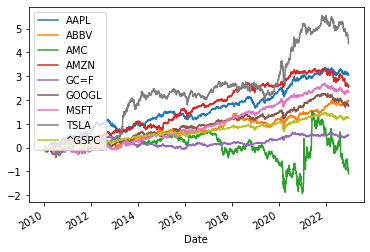

In [145]:
ret_df.cumsum().plot()
# Since the returns are in log, and therefore time-additive
# you can take cumulative sum of returns

In [146]:
ret_df.mean()
# average return of both assets
# gold has a lower mean return

AAPL     0.000931
ABBV     0.000781
AMC     -0.000483
AMZN     0.000786
GC=F     0.000159
GOOGL    0.000541
MSFT     0.000715
TSLA     0.001393
^GSPC    0.000381
dtype: float64

In [147]:
ret_df.std()
# similar std, but gold is lower
# gold has lower vol and ret

AAPL     0.018088
ABBV     0.017221
AMC      0.064257
AMZN     0.020762
GC=F     0.010223
GOOGL    0.016972
MSFT     0.016376
TSLA     0.035791
^GSPC    0.011250
dtype: float64

# combining both assets...
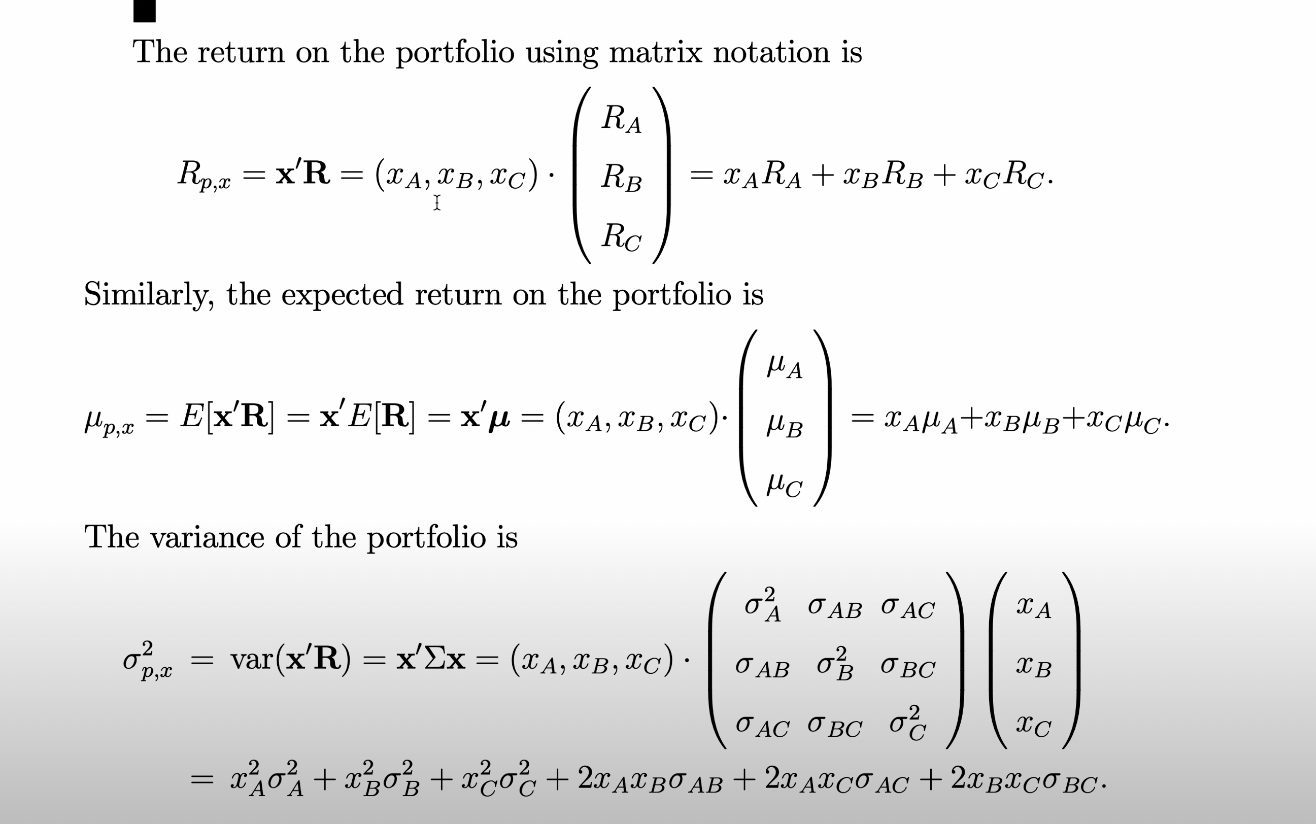

weights X returns + weight X returns
if you do a split portfolio of gold and s&p, returns on the portfolio will be 0.5X(returns of Gold) + 0.5X(returns of s&p).

In [148]:
# flexible vector of equal weights
W = np.ones(len(tickers))/(np.ones(len(tickers))).sum()

# creates numpy array with a 1 assigned for each item
# in a portfolio, then divides it by the total number
# so they are equally weighted

W

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

In [149]:
# Expected return of portfolio is dot product of 
# weights vector and expected returns

(W*ret_df.mean()).sum()

0.0005782038394240414

In [150]:
#also can be done as ^^
port_ret = ret_df.mean().dot(W)

In [151]:
ret_df.mean()
# Now, expected return of gold 
# is higher but s&p is lower

AAPL     0.000931
ABBV     0.000781
AMC     -0.000483
AMZN     0.000786
GC=F     0.000159
GOOGL    0.000541
MSFT     0.000715
TSLA     0.001393
^GSPC    0.000381
dtype: float64

now variance...
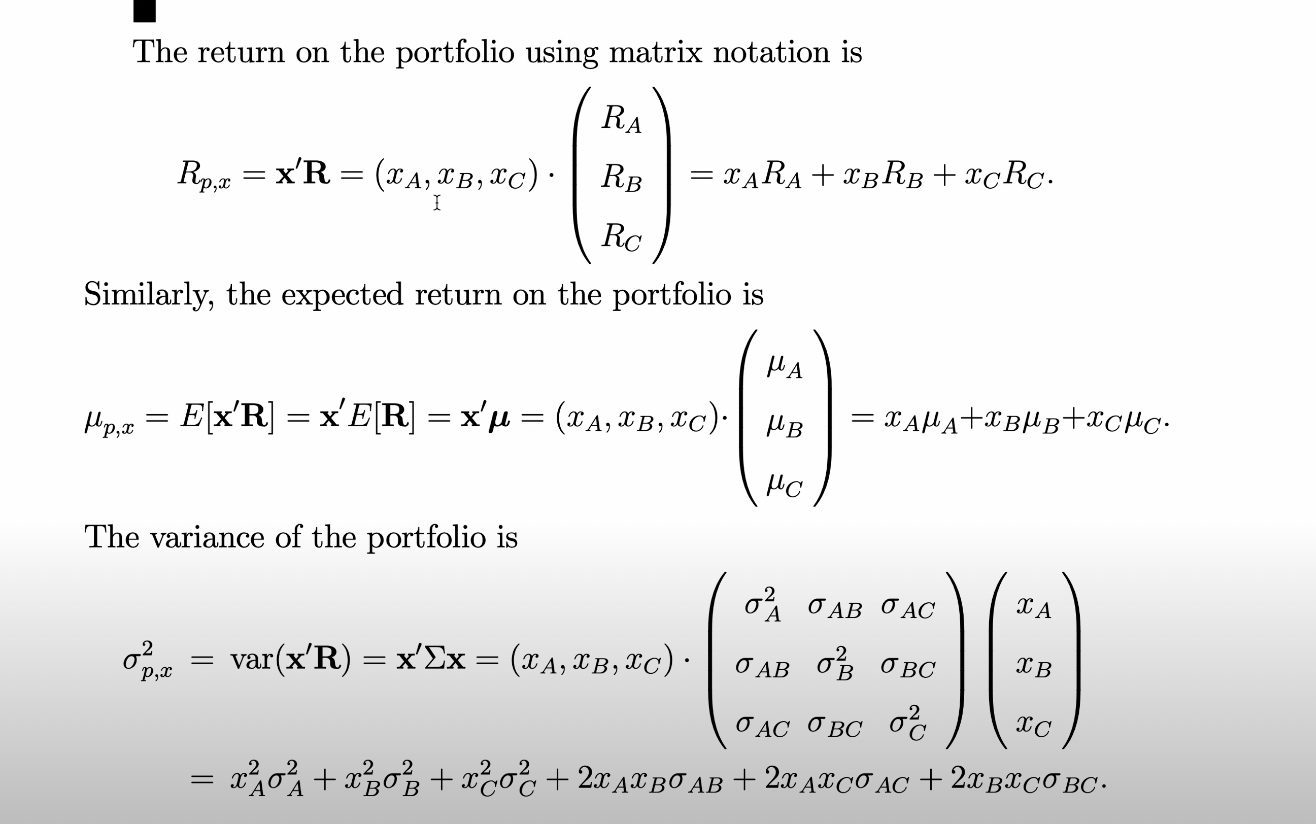

In [152]:
# take dot product again, with covariance matrix
# squared weight, times variance of the first asset 
# plus, squared weight times variance of the second asset
# plus 2* weight 1*weight2 * COVARIANCE OF BOTH

In [153]:
ret_df.cov()

,AAPL,ABBV,AMC,AMZN,GC=F,GOOGL,MSFT,TSLA,^GSPC
AAPL,0.000327,0.000090,0.000196,0.000184,0.000010,0.000174,0.000177,0.000230,0.000140
ABBV,0.000090,0.000297,0.000054,0.000092,-0.000006,0.000106,0.000111,0.000118,0.000096
AMC,0.000196,0.000054,0.004129,0.000200,-0.000019,0.000189,0.000196,0.000397,0.000174
AMZN,0.000184,0.000092,0.000200,0.000431,0.000002,0.000212,0.000192,0.000264,0.000139
GC=F,0.000010,-0.000006,-0.000019,0.000002,0.000105,0.000002,0.000004,0.000021,0.000005
GOOGL,0.000174,0.000106,0.000189,0.000212,0.000002,0.000288,0.000182,0.000207,0.000136
MSFT,0.000177,0.000111,0.000196,0.000192,0.000004,0.000182,0.000268,0.000211,0.000141
TSLA,0.000230,0.000118,0.000397,0.000264,0.000021,0.000207,0.000211,0.001281,0.000172
^GSPC,0.000140,0.000096,0.000174,0.000139,0.000005,0.000136,0.000141,0.000172,0.000127


In [154]:
# doing it from scratch before using dot products
port_var = ((W[0]**2) *0.000104) + (W[1]**2 * 0.000127) + (2*W[0]*W[1]*0.000005)

In [155]:
port_std = port_var**(1/2)

In [156]:
# To make it scalable...use dot products as show in formula
port_risk = W.dot(ret_df.cov().dot(W))**(1/2)
port_risk

0.014424651662788337

In [157]:
ret_df.mean()

AAPL     0.000931
ABBV     0.000781
AMC     -0.000483
AMZN     0.000786
GC=F     0.000159
GOOGL    0.000541
MSFT     0.000715
TSLA     0.001393
^GSPC    0.000381
dtype: float64

In [158]:
ret_df.std()

AAPL     0.018088
ABBV     0.017221
AMC      0.064257
AMZN     0.020762
GC=F     0.010223
GOOGL    0.016972
MSFT     0.016376
TSLA     0.035791
^GSPC    0.011250
dtype: float64

In [159]:
ret_df.mean()/ret_df.std()

AAPL     0.051456
ABBV     0.045381
AMC     -0.007511
AMZN     0.037836
GC=F     0.015553
GOOGL    0.031858
MSFT     0.043662
TSLA     0.038915
^GSPC    0.033881
dtype: float64

In [160]:
port_ret/port_std

0.3352084511178584

In [161]:
# without subtracting a risk free rate
# you can see that there is a better
# Sharpe with an equal weight then with seperate weights
# Now to optimize...

In [162]:
def neg_sharpe(W):
    return -(ret_df.mean().dot(W))/(W.dot(ret_df.cov().dot(W))**(1/2))

In [163]:
bounds = [ (0,1) for n in range(len(tickers))]
def check_sum(W): 
    return np.sum(W) - 1
cons = ({'type':'eq','fun':check_sum})
opt_results = minimize(neg_sharpe, W, method = 'SLSQP', bounds=bounds, constraints = cons)


In [164]:
opt_results

     fun: -0.06526260600231847
     jac: array([ 3.26707028e-04, -4.45694663e-04,  1.05538825e-01, -1.94964930e-04,
       -1.97924674e-05,  1.34022487e-02,  1.57794915e-04,  5.83967194e-04,
        1.69357285e-02])
 message: 'Optimization terminated successfully'
    nfev: 121
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([0.2923759 , 0.30472592, 0.        , 0.05648221, 0.23305448,
       0.        , 0.02754337, 0.08581811, 0.        ])

In [165]:
opt_results.x

array([0.2923759 , 0.30472592, 0.        , 0.05648221, 0.23305448,
       0.        , 0.02754337, 0.08581811, 0.        ])

In [166]:
(ret_df.mean().dot(opt_results.x))/(opt_results.x.dot(ret_df.cov().dot(opt_results.x))**(1/2))

0.06526260600231847

In [167]:
# a1D = np.array([0.4, 0.1, 0.3, 0.2])

In [168]:
# (ret_df.mean().dot(a1D))/(a1D.dot(ret_df.cov().dot(a1D))**(1/2))